# Supplements for Lecture 01 


In [1]:
# Load liberaries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

> One can use `plt.imread` or `cv2.imread` to load image, both of them
will be come 2D numpy array.
Be aware that `plt.imread` give you `rgb` channel, but
`cv2.imread` will give you `bgr` channel.

In this supplements, we assume that the user has very basis knowledge of 
numpy array. Otherwise, please refer to https://www.youtube.com/watch?v=xECXZ3tyONo.

## Digital image representation

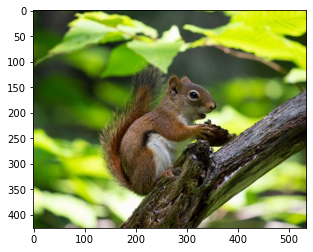

In [2]:
filename  = './data/squirrel_cls.jpg'
I_rgb     = np.array(Image.open(filename))
plt.imshow(I_rgb)
plt.show()

In [3]:
# Image are represented as image plan coordinate.
# For example if we want extract the rgb value of row 200, col 250;
y = 50
x = 425
print(f"Red  : {I_rgb[y,x,0]}")
print(f"Green: {I_rgb[y,x,1]}")
print(f"Blue : {I_rgb[y,x,2]}")

Red  : 213
Green: 240
Blue : 1


We can also load each individual channel.

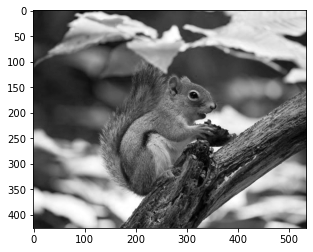

In [4]:
# Red channel
plt.imshow(I_rgb[:, :, 0], "gray",  vmin=0, vmax=255)
plt.show()

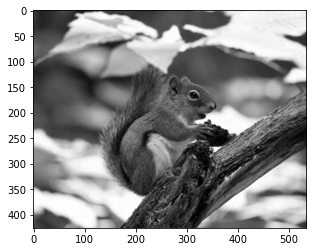

In [5]:
# green channel
plt.imshow(I_rgb[:, :, 1], "gray",  vmin=0, vmax=255)
plt.show()

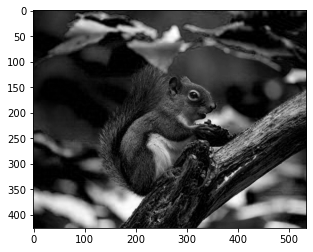

In [6]:
# blue channel
plt.imshow(I_rgb[:, :, 2], "gray", vmin=0, vmax=255)
plt.show()

Many computer vision techquicXXXXXX are based on gray scale image.
We can make a easy conversion from rgb to gray scale in the following

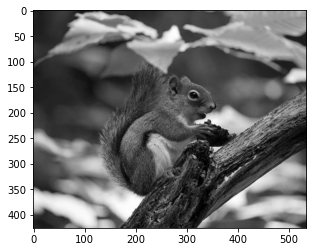

In [7]:
def convert_rgb2gray(rbg_image):
    return np.floor(rbg_image[:,:,0]/3+rbg_image[:,:,1]/3+rbg_image[:,:,2]/3)

I_gray = convert_rgb2gray(I_rgb)
plt.imshow(I_gray, "gray")
plt.show()

## Point Operators

### Negative image

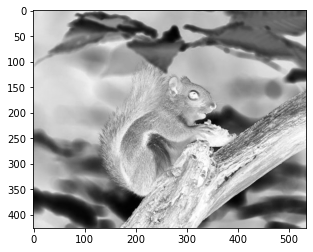

In [8]:
def negative_image(gray_image):
    return 255 - gray_image

I_gray_negative = negative_image(I_gray)
plt.imshow(I_gray_negative, "gray", vmin=0, vmax=255)
plt.show()

### Contrast Stretching

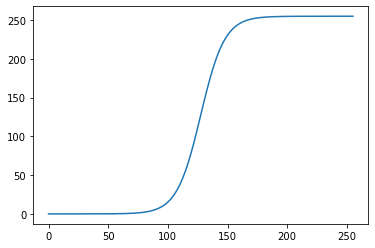

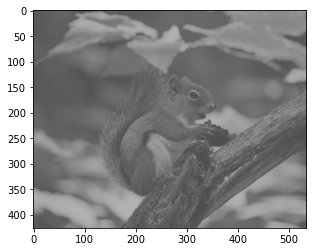

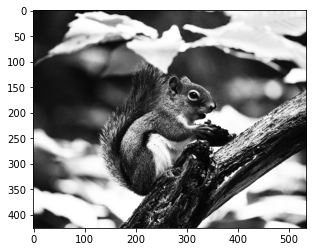

In [9]:
def contrast_stretch(gray_image, strength):
    mean = np.mean(gray_image)
    return 1/(1+ np.exp(-(gray_image-mean)*strength))*255
    
x = np.linspace(0, 255, 2000)
plt.plot(x, contrast_stretch(x, 0.1))
plt.show()
    
filename  = './data/squirrel_low_contrast.png'
I_low_contrast = np.array(Image.open(filename))
I_low_contrast = convert_rgb2gray(I_low_contrast)

plt.imshow(I_low_contrast, "gray", vmin=0, vmax=255)
plt.show()

plt.imshow(contrast_stretch(I_low_contrast, 0.1), "gray", vmin=0, vmax=255)
plt.show()

### Binary image

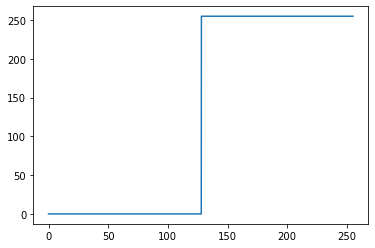

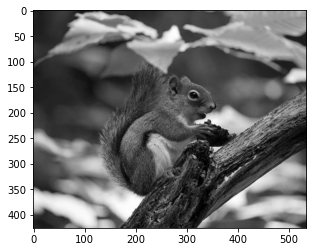

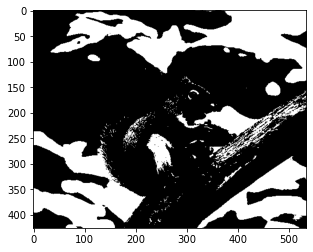

In [10]:
def binary_image(gray_image, k):
    return np.where(gray_image < k, 0.0, 255.0)

x = np.linspace(0, 255, 2000)
plt.plot(x, binary_image(x, 128))
plt.show()

plt.imshow(I_gray, "gray", vmin=0, vmax=255.0)
plt.show()

plt.imshow(binary_image(I_gray, 128.0), "gray", vmin=0, vmax=255)
plt.show()

### Gamma correction

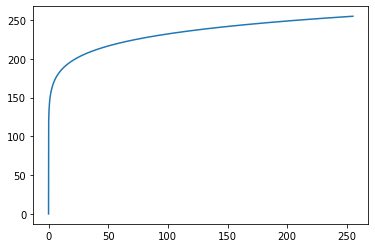

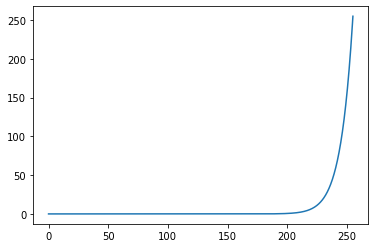

Original


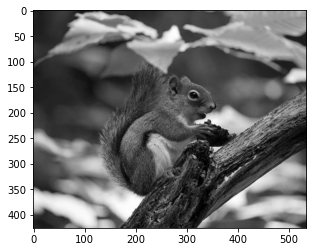

Distroy the image by purpose


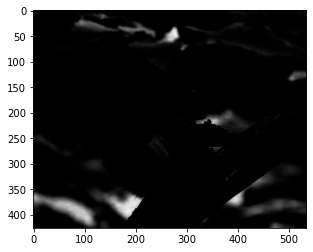

Recover the image by gamma correction


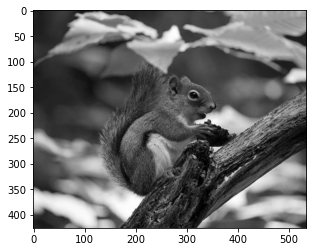

In [11]:
def gamma_correction(gray_image, gamma):
    c = 255.0/np.power(255.0, gamma)
    return c*np.power(gray_image, gamma)

x = np.linspace(0, 255, 2000)
plt.plot(x, gamma_correction(x, 0.1))
plt.show()
plt.plot(x, gamma_correction(x, 25))
plt.show()

print("Original")
plt.imshow(I_gray, "gray", vmin=0, vmax=255.0)
plt.show()

print("Distroy the image by purpose")
I_gamma_distroy = gamma_correction(I_gray, 10)
plt.imshow(gamma_correction(I_gray, 10), "gray", vmin=0, vmax=255)
plt.show()

print("Recover the image by gamma correction")
plt.imshow(gamma_correction(I_gamma_distroy, 0.1), "gray", vmin=0, vmax=255)
plt.show()

## Histogram

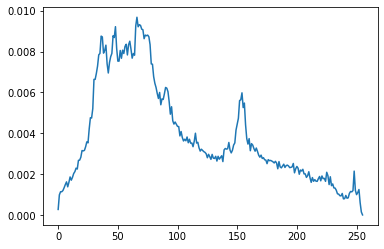

In [12]:
def normalized_histogram(gray_image):
    height, width = gray_image.shape
    I_flatten = gray_image.flatten()
    histogram, _ =np.histogram(I_flatten, bins=256, range=(0,255))
    return histogram/(height*width)

plt.plot(normalized_histogram(I_gray))
plt.show()

### Histogram equalization

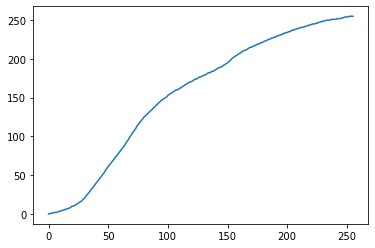

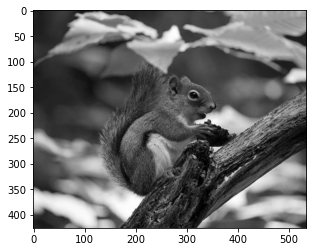

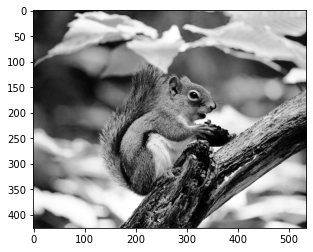

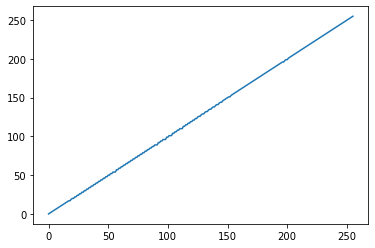

In [13]:
def histogram_equalization(gray_image):
    norm_hist = normalized_histogram(gray_image)
    return np.round(255*np.cumsum(norm_hist))
    
transform = histogram_equalization(I_gray)
plt.plot(transform)
plt.show()

height, width = I_gray.shape
I_gray_eq = np.zeros_like(I_gray)
for y in range(height):
    for x in range(width):
        integer = int(np.round(I_gray[y,x]))
        I_gray_eq[y,x] = transform[integer]
        
plt.imshow(I_gray, "gray", vmin=0, vmax=255.0)
plt.show()

plt.imshow(I_gray_eq, "gray", vmin=0, vmax=255.0)
plt.show()

plt.plot(histogram_equalization(I_gray_eq))
plt.show()

### Thresholding
#### Otsu method

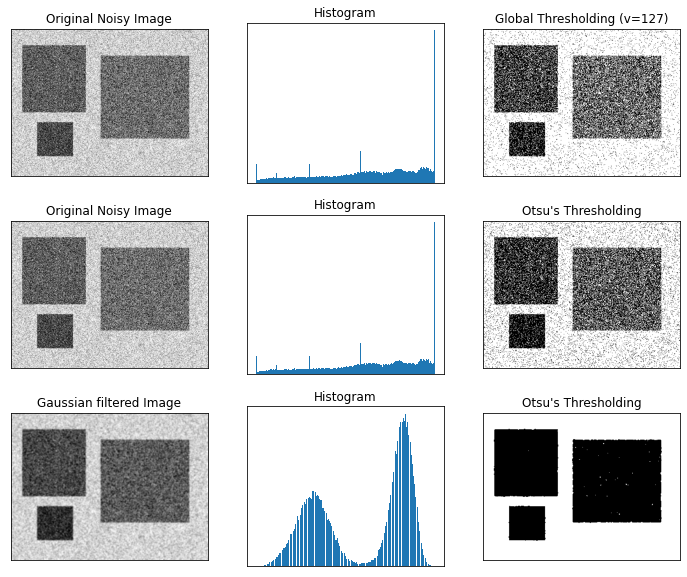

In [14]:
img = cv.imread('./data/pic2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# source: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

---
## Neigborhood Operator
### Derivative

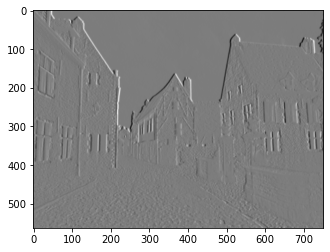

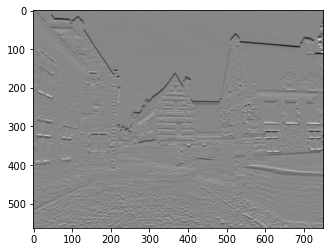

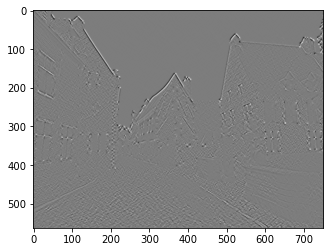

In [20]:
# Read the original image
img = cv.imread('./data/leuvenA.jpg') 

# Convert to graycsale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
plt.imshow(sobelx, "gray")
plt.show()
plt.imshow(sobely, "gray")
plt.show()
plt.imshow(sobelxy, "gray")
plt.show()
# Inspired from https://learnopencv.com/edge-detection-using-opencv/

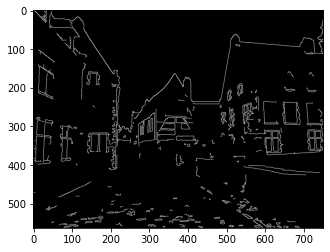

In [21]:
# Canny Edge Detection
edges = cv.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges, "gray")
plt.show()
# Inspired from https://learnopencv.com/edge-detection-using-opencv/

### Laplacian of Gaussian
The `ddepth` will change the data of array to avoid overflow.  
For example: If you have filter like 

$$
h = \begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
$$

to convolve on 

$$
f = \begin{bmatrix}
0 & 0 & 0\\
0 & 255 & 0\\
0 & 0 & 0
\end{bmatrix}
$$

you will get $-4\cdot 255 + 4 = -1016$, which can not be stored in `uint8` (unsigned char 0-255).
So, we need to change the data type to `int16` (signed short int, –32,768 to 32,767). In opencv, we can do this by passing
the argument `cv.CV_16S`.

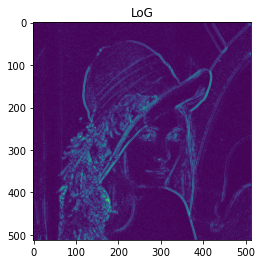

In [29]:
# [variables]
# Declare the variables we are going to use
ddepth = cv.CV_16S 
kernel_size = 3

imageName = './data/lena.jpg'
src = cv.imread(cv.samples.findFile(imageName), cv.IMREAD_COLOR) # Load an image

# Remove noise by blurring with a Gaussian filter
src = cv.GaussianBlur(src, (3, 3), 0)

# Convert the image to grayscale
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Apply Laplace functionb
dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)

# converting back to uint8
abs_dst = cv.convertScaleAbs(dst)

plt.imshow(abs_dst)
plt.title("LoG")
plt.show()
# Inspired from https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html